In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import pandas as pd
import csv

In [55]:
from water_pollution.data.preproc import Station
from water_pollution.data.preproc import get_rawdf_from_pc_file
from water_pollution.data.preproc import cook_rawdf
from water_pollution.data.preproc import split_rawdf_to_stations

from water_pollution.data import visu

In [52]:
file_path = '../../raw_data/pc_saone_2011_2021/Analyses.CSV'

In [71]:
# builds raw dataframe from file
raw_df = pp.get_rawdf_from_pc_file(file_path)

# Splits raw_df to stations
stations = pp.split_rawdf_to_stations(raw_df)

# Cooks all the raw_df
for st in stations :
    st.df = cook_rawdf(st.df)

In [90]:
# Concatenates all stations, ignoring the index
df_list = [ st.df for st in stations ]
saone_df = pd.concat(df_list,ignore_index=True)

In [91]:
# Pickle save
save_path = '../../cooked_data/2011_2021_pc_saone_df.pickle'
saone_df.to_pickle(save_path)

In [97]:
# Restore Pickle
restored_df = pd.read_pickle(save_path)

6000990  /  SAONE A BELRUPT 


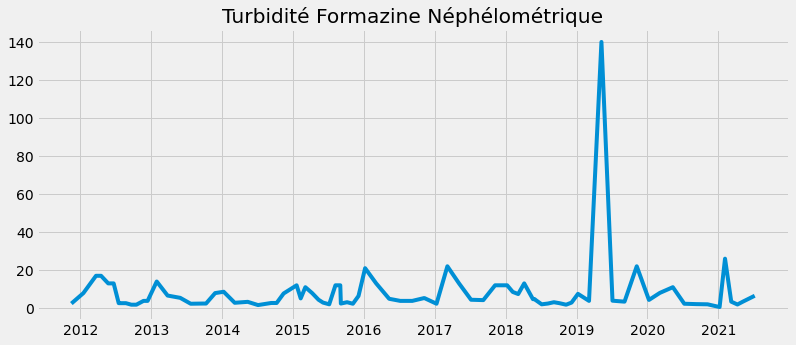

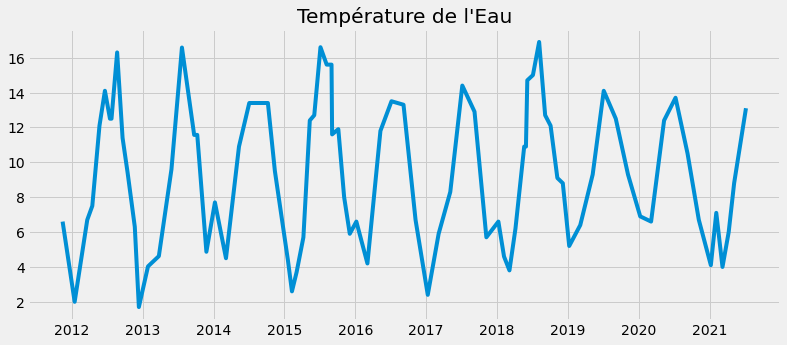

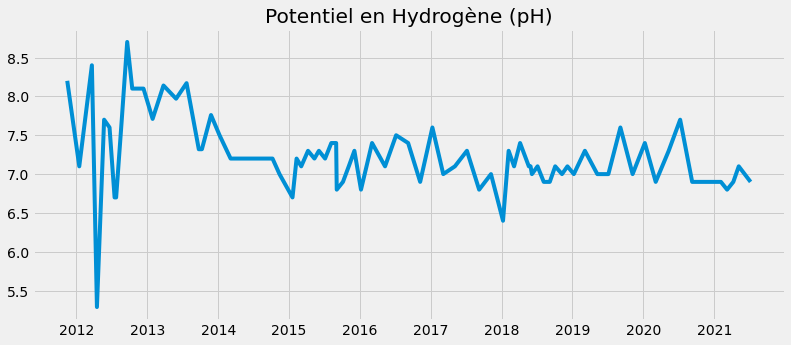

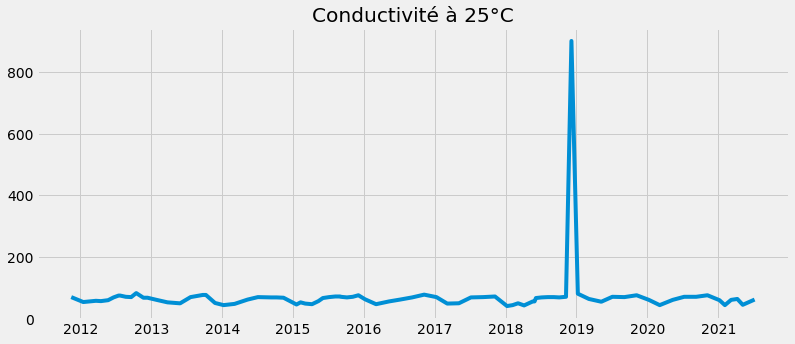

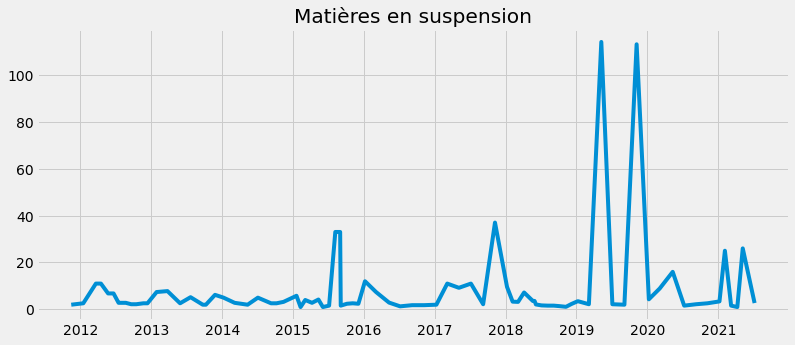

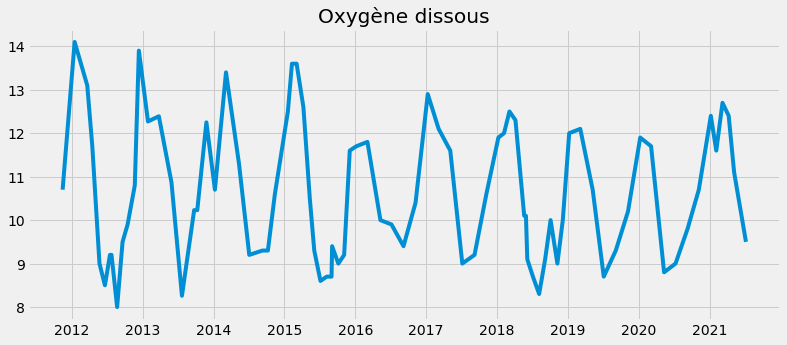

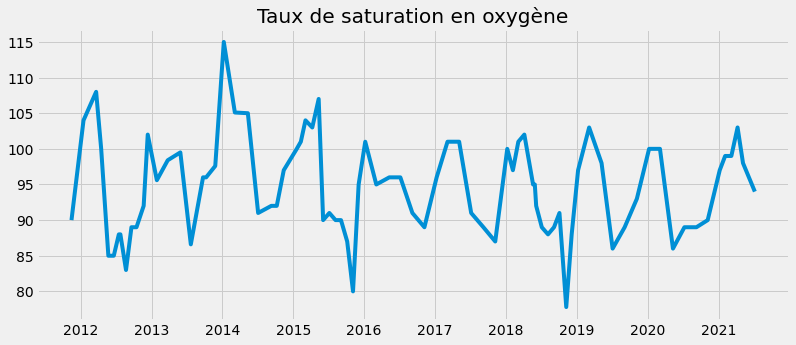

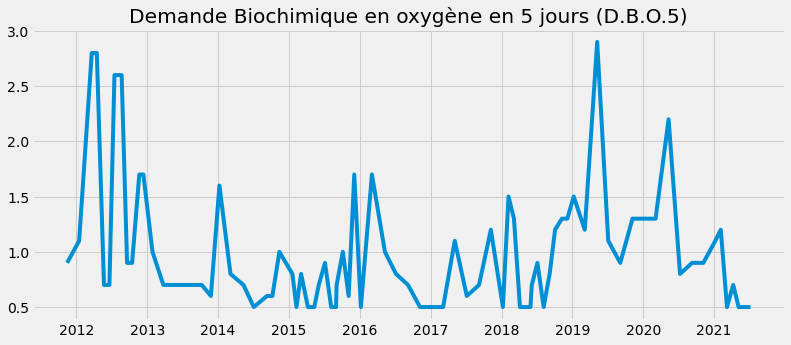

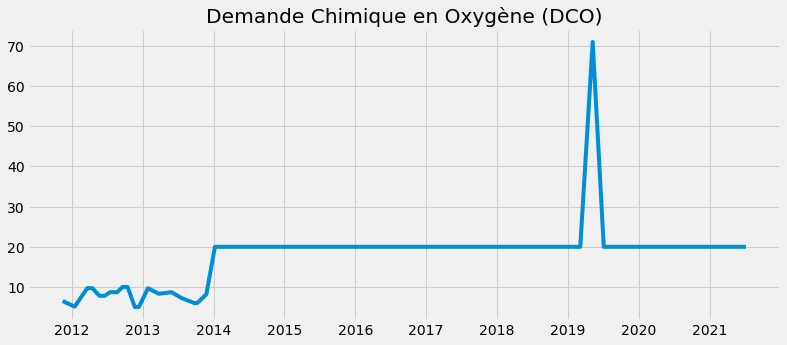

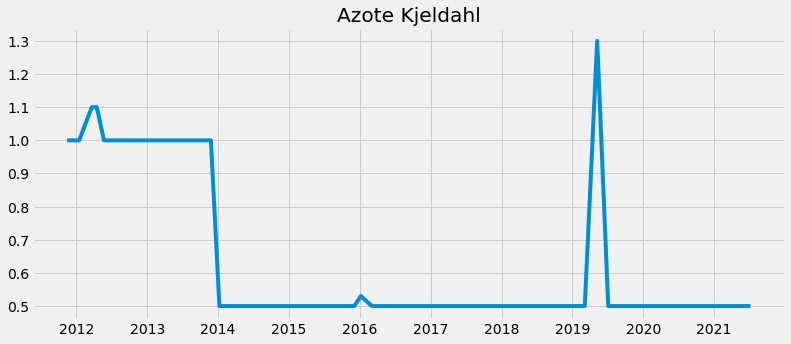

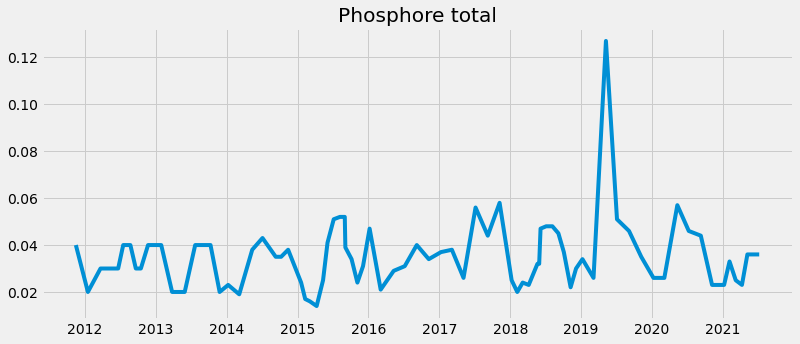

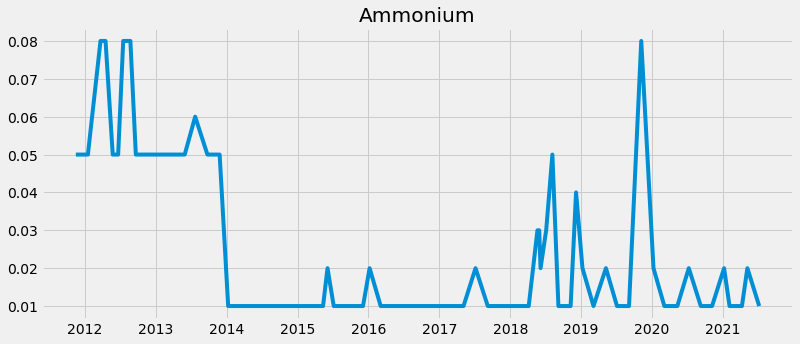

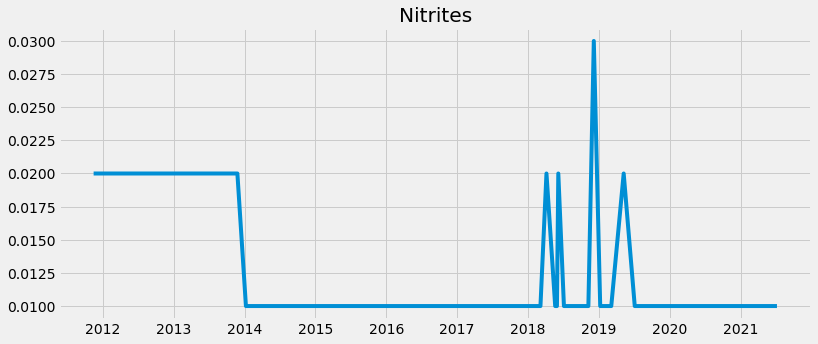

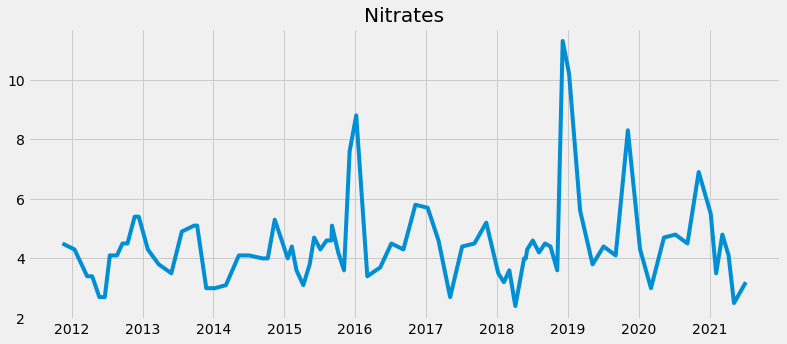

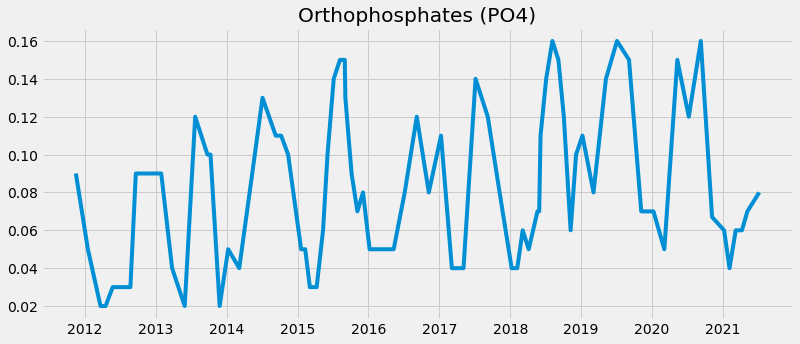

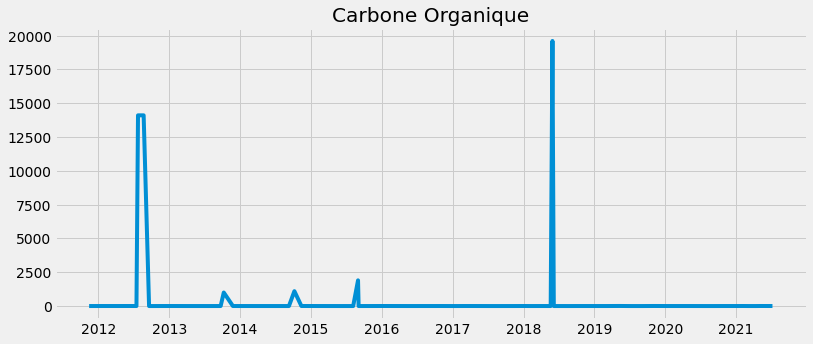

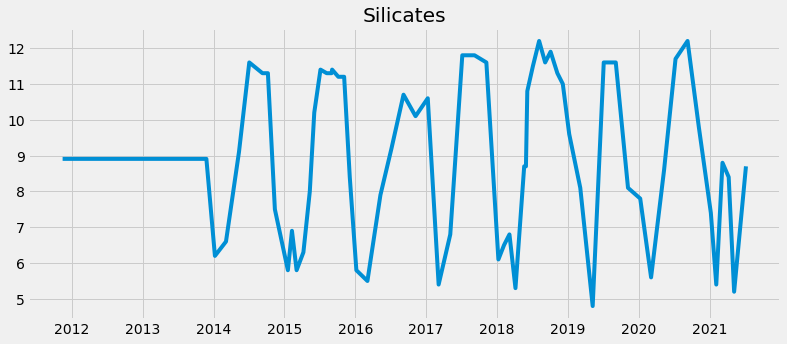

In [79]:
# Visualisation station par station...

st = stations[0]
print(st.id,' / ',st.label)
visu.plot_params(st.df)